In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Instruction 1 : 
Calculez le nombre total d’humains sur la planète

In [2]:
Pop = pd.read_csv('fr_population (1).csv')
Anim = pd.read_csv('fr_animaux.csv')
Veget = pd.read_csv('fr_vegetaux.csv')

In [3]:
#calcul de la population totale
total = Pop['Valeur'].sum()
total = total*1000
total

8413993000

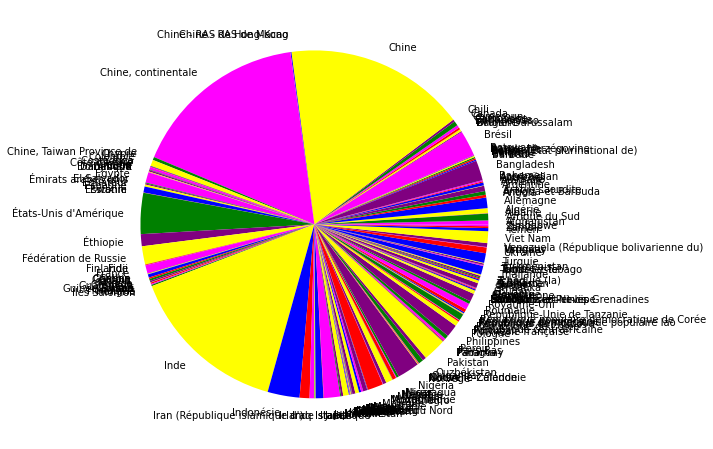

In [4]:
#visualisation de la distribution de la population mondiale
plt.figure(figsize = (8, 8))
x = Pop['Valeur']
colors = ["magenta", "green", "purple", "yellow", "blue", "red",]
plt.pie(x, labels = Pop['Zone'], colors= colors
           )
plt.show()




Apres la visualisation de la population nous avons remarqué la redondance de la zone chine.
Nous allons Supprimer la zone "chine" qui est un aggregat 

In [5]:
#suppression 
Pop=Pop[Pop['Symbole'] != 'A']
#calcul du nouveau total de la population
total = Pop['Valeur'].sum()
total = total*1000
total

6997326000

### Instruction 2 :Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

In [6]:
# On ne garde que les colonnes qui nous seront utiles pour le reste
Pop= Pop[['Zone', 'Code zone', 'Année','Valeur']]
Pop =Pop.rename(columns={'Zone' : 'pays', 
                         'Code zone' : 'code_pays',
                          'Valeur' : 'population'})

In [7]:
Pop.head()

,pays,code_pays,Année,population
0,Afghanistan,2,2013,30552
1,Afrique du Sud,202,2013,52776
2,Albanie,3,2013,3173
3,Algérie,4,2013,39208
4,Allemagne,79,2013,82727


In [8]:
#on crée un nouveau dataframe rergourpant ttes les données
Alim = Anim
Alim['origine'] = 'animal'
Veget['origine'] = 'vegetal'

# On merge les deux tables 
Alim = Alim.append(Veget)

# On modifie la table de manière à ce que chaque élément devienne une colonne
# On renomme les colonnes du nouveau DataFrame
Alim = pd.pivot_table(Alim, index=['Code zone', 'Zone', 'Code Produit', 'Produit', 'origine'], columns = 'Élément', values = 'Valeur', aggfunc=np.sum).reset_index()
Alim.columns.name = None
Alim = Alim.rename(columns = {'Zone' : 'pays', 
                                          'Code zone' : 'code_pays', 
                                          'Produit' : 'produit', 
                                          'Code Produit' : 'code_produit', 
                                          'Disponibilité alimentaire (Kcal/personne/jour)' : 'dispo_kcal_p_j',
                                          'Disponibilité alimentaire en quantité (kg/personne/an)' : 'dispo_kg_p',
                                          'Disponibilité de matière grasse en quantité (g/personne/jour)' : 'dispo_mat_g_p_j',
                                          'Disponibilité de protéines en quantité (g/personne/jour)' : 'dispo_prot_g_p_j',
                                          'Disponibilité intérieure': 'dispo_int',
                                          'Nourriture' : 'nourriture'
                                          })
Alim=Alim[['pays','code_pays','produit','origine','code_produit','nourriture','dispo_kcal_p_j','dispo_kg_p','dispo_mat_g_p_j','dispo_prot_g_p_j','dispo_int']]
#On merge les tables aliments et population
Alim = pd.merge(Alim, Pop, on =['pays', 'code_pays'])


In [9]:
Alim.head()

,pays,code_pays,produit,origine,code_produit,nourriture,dispo_kcal_p_j,dispo_kg_p,dispo_mat_g_p_j,dispo_prot_g_p_j,dispo_int,Année,population
0,Arménie,1,Blé,vegetal,2511,389.0,1024.0,130.60,3.60,30.52,554.0,2013,2977
1,Arménie,1,Orge,vegetal,2513,0.0,0.0,0.00,0.00,0.00,198.0,2013,2977
2,Arménie,1,Maïs,vegetal,2514,0.0,0.0,0.03,NaN,0.01,102.0,2013,2977
3,Arménie,1,Seigle,vegetal,2515,0.0,1.0,0.12,0.00,0.02,1.0,2013,2977
4,Arménie,1,Avoine,vegetal,2516,1.0,2.0,0.37,0.03,0.09,6.0,2013,2977


In [10]:
# On crée une colonne contenant la disponibilité alimentaire en kcal total pour chaque pays et chaque produit
Alim['dispo_alim_kcal'] = Alim['dispo_kcal_p_j']* (Alim['population']*1000)* 365


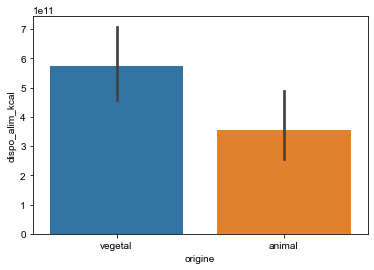

In [11]:
#on visualise la dispo en kcal pour les produits vegetaux et animaliers 
sns.barplot(Alim['origine'],Alim['dispo_alim_kcal'])
sns.set(rc={'figure.figsize':(5,5)})

In [12]:
# On crée une colonne contenant la disponibilité alimentaire en protéines pour chaque pays et chaque produit
Alim['dispo_alim_prot'] = (Alim['dispo_prot_g_p_j'] / 1000) * (Alim['population']*1000) * 365

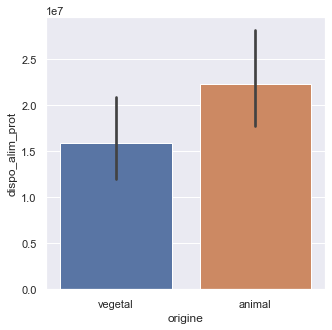

In [13]:
#on visualise la dispo en proteine pour les produits vegetaux et animaliers
sns.barplot(Alim['origine'],Alim['dispo_alim_prot'])
sns.set(rc={'figure.figsize':(5,5)},palette='rocket')

# Instruction 3 : 
A partir de ces dernières informations, et à partir du poids de la
disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour
chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. 


In [14]:
#on calcule le ration Kcal/kg
Alim['Ratio_energie'] = Alim['dispo_alim_kcal']/(Alim['dispo_kg_p']*(Alim['population']*1000))
Alim[0:8]

,pays,code_pays,produit,origine,code_produit,nourriture,dispo_kcal_p_j,dispo_kg_p,dispo_mat_g_p_j,dispo_prot_g_p_j,dispo_int,Année,population,dispo_alim_kcal,dispo_alim_prot,Ratio_energie
0,Arménie,1,Blé,vegetal,2511,389.0,1024.0,130.60,3.60,30.52,554.0,2013,2977,1.112684e+12,33163184.60,2861.868300
1,Arménie,1,Orge,vegetal,2513,0.0,0.0,0.00,0.00,0.00,198.0,2013,2977,0.000000e+00,0.00,NaN
2,Arménie,1,Maïs,vegetal,2514,0.0,0.0,0.03,NaN,0.01,102.0,2013,2977,0.000000e+00,10866.05,0.000000
3,Arménie,1,Seigle,vegetal,2515,0.0,1.0,0.12,0.00,0.02,1.0,2013,2977,1.086605e+09,21732.10,3041.666667
4,Arménie,1,Avoine,vegetal,2516,1.0,2.0,0.37,0.03,0.09,6.0,2013,2977,2.173210e+09,97794.45,1972.972973
5,Arménie,1,Millet,vegetal,2517,NaN,NaN,NaN,NaN,NaN,0.0,2013,2977,NaN,NaN,NaN
6,Arménie,1,Sorgho,vegetal,2518,NaN,NaN,NaN,NaN,NaN,0.0,2013,2977,NaN,NaN,NaN
7,Arménie,1,"Céréales, Autres",vegetal,2520,6.0,14.0,1.96,0.04,0.39,21.0,2013,2977,1.521247e+10,423775.95,2607.142857


In [15]:
##on calcule le ration proteines/kg
Alim['Ratio_proteines'] = (Alim['dispo_alim_prot'] /(Alim['dispo_kg_p']*1000*Alim['population']))
Alim[0:8]

,pays,code_pays,produit,origine,code_produit,nourriture,dispo_kcal_p_j,dispo_kg_p,dispo_mat_g_p_j,dispo_prot_g_p_j,dispo_int,Année,population,dispo_alim_kcal,dispo_alim_prot,Ratio_energie,Ratio_proteines
0,Arménie,1,Blé,vegetal,2511,389.0,1024.0,130.60,3.60,30.52,554.0,2013,2977,1.112684e+12,33163184.60,2861.868300,0.085297
1,Arménie,1,Orge,vegetal,2513,0.0,0.0,0.00,0.00,0.00,198.0,2013,2977,0.000000e+00,0.00,NaN,NaN
2,Arménie,1,Maïs,vegetal,2514,0.0,0.0,0.03,NaN,0.01,102.0,2013,2977,0.000000e+00,10866.05,0.000000,0.121667
3,Arménie,1,Seigle,vegetal,2515,0.0,1.0,0.12,0.00,0.02,1.0,2013,2977,1.086605e+09,21732.10,3041.666667,0.060833
4,Arménie,1,Avoine,vegetal,2516,1.0,2.0,0.37,0.03,0.09,6.0,2013,2977,2.173210e+09,97794.45,1972.972973,0.088784
5,Arménie,1,Millet,vegetal,2517,NaN,NaN,NaN,NaN,NaN,0.0,2013,2977,NaN,NaN,NaN,NaN
6,Arménie,1,Sorgho,vegetal,2518,NaN,NaN,NaN,NaN,NaN,0.0,2013,2977,NaN,NaN,NaN,NaN
7,Arménie,1,"Céréales, Autres",vegetal,2520,6.0,14.0,1.96,0.04,0.39,21.0,2013,2977,1.521247e+10,423775.95,2607.142857,0.072628


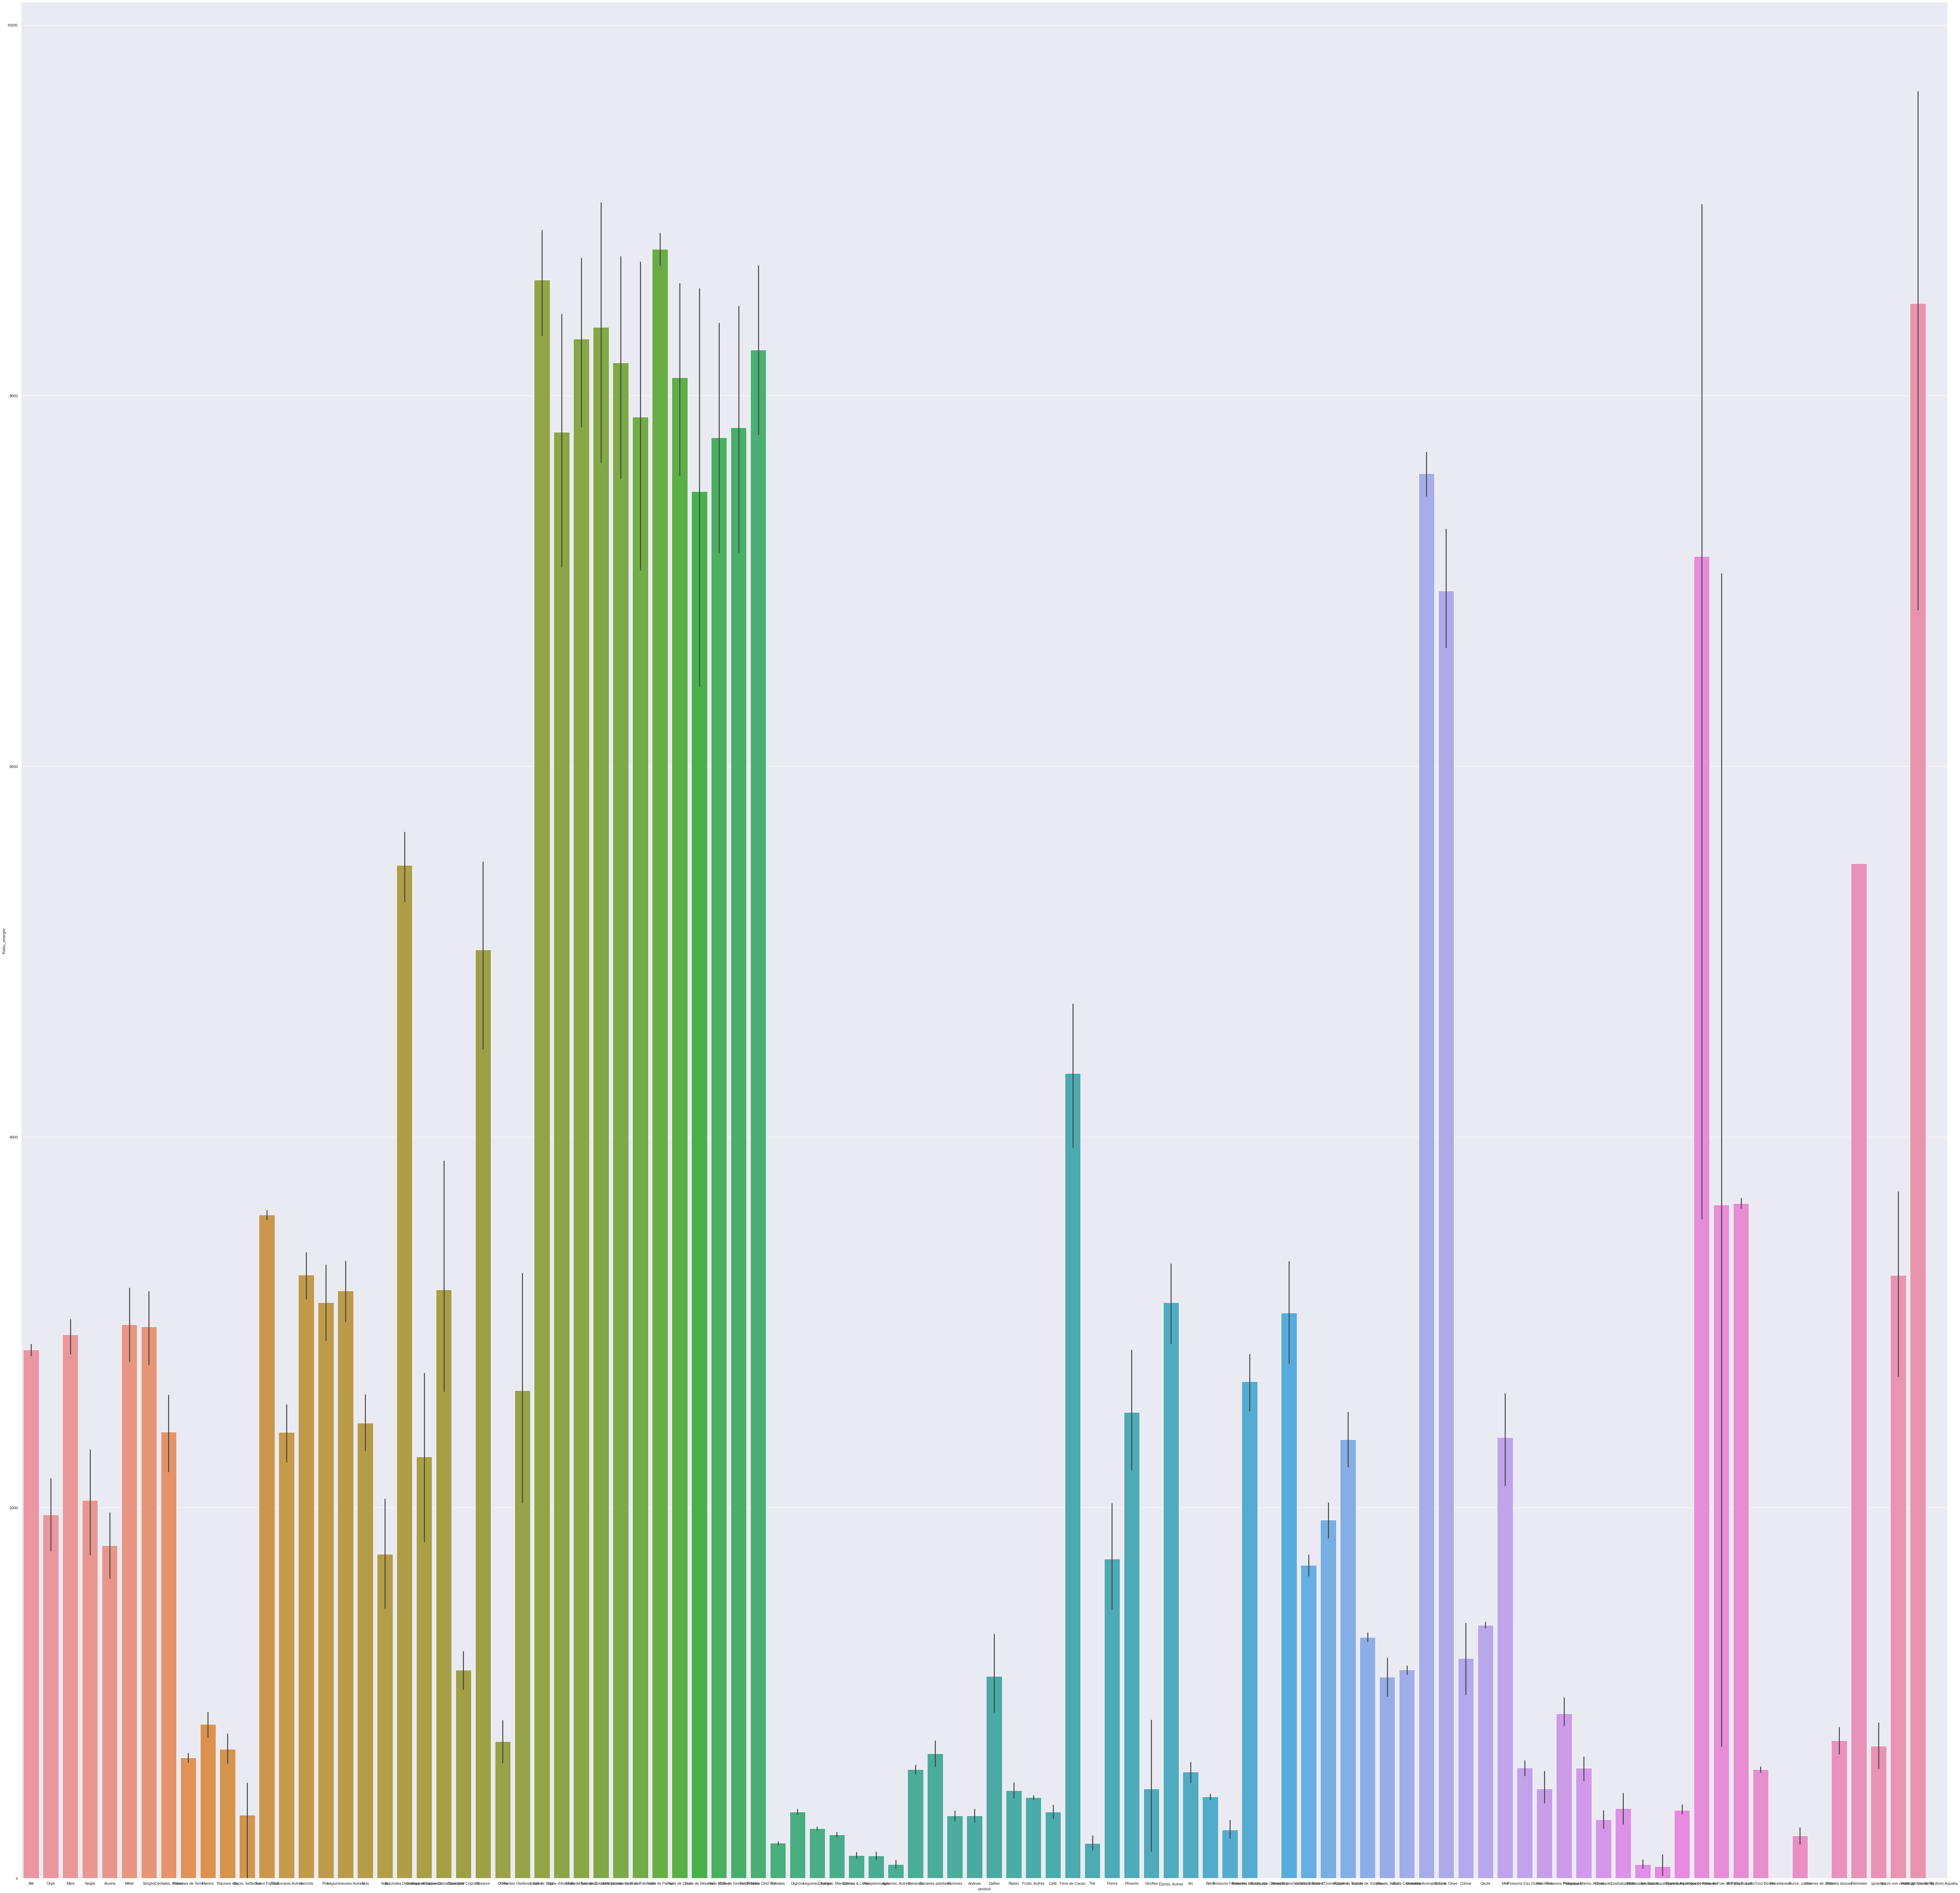

In [26]:
#visualisation du ratio_energie par produit
sns.barplot(Alim['produit'],Alim['Ratio_energie'])
sns.set(rc={'figure.figsize':(5,5)})

# Instruction 4 : 
Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids

In [17]:
# On regroupe les aliments les plus caloriques pour avoir une valeur moyenne pour chaque produit
Dispo_moy = Alim.groupby(Alim['produit']).agg('mean')
# On remplace les valeurs infinis par des NaN
Dispo_moy = Dispo_moy.replace([-np.inf, np.inf], np.nan)
# On affiche les 5 premiers produits les plus caloriques
Dispo_moy = Dispo_moy.sort_values('Ratio_energie', ascending = False)
Dispo_moy.iloc[0:5]

,code_pays,code_produit,nourriture,dispo_kcal_p_j,dispo_kg_p,dispo_mat_g_p_j,dispo_prot_g_p_j,dispo_int,Année,population,dispo_alim_kcal,dispo_alim_prot,Ratio_energie,Ratio_proteines
produit,,,,,,,,,,,,,,
Huile de Palme,124.611765,2577.0,123.691057,74.016393,3.048130,8.365738,0.028000,296.523529,2013.0,41059.794118,1.087285e+12,314252.346667,8791.217534,0.003913
Huile de Soja,125.660819,2571.0,144.023669,68.402367,2.843018,7.729586,0.031707,245.385965,2013.0,40826.280702,1.244761e+12,724723.702439,8625.483876,0.002016
Huile de Son de Riz,108.523810,2581.0,46.944444,5.000000,0.220000,0.590556,0.010000,54.150000,2013.0,191702.761905,3.739515e+11,464075.600000,8497.969939,0.006887
Huile de Colza&Moutarde,124.257862,2574.0,81.700000,34.958678,1.469583,3.986750,0.019310,147.270440,2013.0,43518.245283,7.098785e+11,198405.441379,8368.869607,0.002395
Huile de Tournesol,125.313253,2573.0,62.938272,56.707317,2.372407,6.491790,0.020976,82.164634,2013.0,41951.548193,5.444558e+11,209892.715854,8305.568299,0.001316


# Instruction 5 : 
: Citez 5 aliments parmi les 20 aliments les plus riches en protéines. 


In [18]:
# On regroupe les aliments les plus riches en proteines pour avoir une valeur moyenne pour chaque produit
Dispo_moy = Alim.groupby(Alim['produit']).agg('mean')
# On remplace les valeurs infinis par des NaN
Dispo_moy = Dispo_moy.replace([-np.inf, np.inf], np.nan)
# On affiche les 5 premiers produits les plus riches en proteines
Dispo_moy = Dispo_moy.sort_values('Ratio_proteines', ascending = False)
Dispo_moy=pd.DataFrame(Dispo_moy)
Dispo_moy.iloc[0:5]


,code_pays,code_produit,nourriture,dispo_kcal_p_j,dispo_kg_p,dispo_mat_g_p_j,dispo_prot_g_p_j,dispo_int,Année,population,dispo_alim_kcal,dispo_alim_prot,Ratio_energie,Ratio_proteines
produit,,,,,,,,,,,,,,
Soja,126.337349,2555.0,66.136646,6.745342,0.789565,0.401008,0.746327,1611.114458,2013.0,41802.704819,2.238726e+11,2.343804e+07,1748.819646,0.253382
Arachides Decortiquees,125.717647,2556.0,72.630952,21.797619,1.438036,1.812024,0.952202,174.676471,2013.0,40791.558824,3.866596e+11,1.671491e+07,5466.324644,0.247908
Pois,125.993865,2547.0,38.098039,8.941558,0.963203,0.048489,0.598543,64.876543,2013.0,41659.785276,1.261555e+11,8.601115e+06,3106.951940,0.221081
Légumineuses Autres,125.631579,2549.0,160.088235,29.005882,3.100412,0.206957,1.874260,228.742690,2013.0,40751.695906,5.544300e+11,3.400806e+07,3170.465864,0.220259
Haricots,125.207101,2546.0,109.534591,28.062500,3.049811,0.133529,1.843694,134.291667,2013.0,41165.372781,3.675959e+11,2.393320e+07,3256.453914,0.217191


# Instruction 6 : 
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [19]:
# On crée un dataframe qui ne contient que les données d'origine végétale
Alim_veg = Alim.loc[Alim['origine'] == 'vegetal']
Alim_veg = Alim_veg.replace([-np.inf, np.inf], np.nan)

# On calcule le nombre de calories totales en multipliant le ratio par la disponibilité intérieure mondiale
Alim_veg['dispo_int_kcal'] = (Alim_veg['dispo_int'] * 1000000) * Alim_veg['Ratio_energie']
#on somme la totalité des kcal de la dispo interieure
dispo_int_veg_kcal = Alim_veg['dispo_int_kcal'].sum(skipna=True)
print('La disponibilité intérieure mondiale des produits vegetaux est : ' + str(dispo_int_veg_kcal) + ' kcal.')

La disponibilité intérieure mondiale des produits vegetaux est : 1.2166421524173388e+16 kcal.


# Instruction 7 : 
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ?
Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage
de la population mondiale

In [20]:
# on calcule le nbre de kcal annuel necessaire a une personne
#en se basant sur le fait qu'une personne necessite en moyenne 2000kcal /j
nombre_kcal_personne = Alim_veg['dispo_int_kcal'].sum(skipna=True) / (2000 * 365)
print("Nombre de personnes que l'on peut nourrir par an avec les calories de la disponibilité intérieure des produits vegetaux "+str(nombre_kcal_personne))

#calcul du % d'humains pouvant etre nourris
pourcentage_humains_kcal = (nombre_kcal_personne /(Pop['population'].sum(skipna=True)*1000))* 100
print("Pourcentage d'humains nourris avec les calories de la disponibilité intérieure des produits vegetaux: "
     + str(pourcentage_humains_kcal) + " %")


Nombre de personnes que l'on peut nourrir par an avec les calories de la disponibilité intérieure des produits vegetaux 16666330855.032038
Pourcentage d'humains nourris avec les calories de la disponibilité intérieure des produits vegetaux: 238.1814260909387 %


In [21]:
#On ajoute une colonne contenant le pourcentage de protéines ce qui nous permettra 
#de calculer la dispo interieure mondiale en proteine
Alim['proteines (%)'] = (Alim['dispo_alim_prot'] /(Alim['dispo_kg_p']*1000*Alim['population'])) * 100

In [22]:
Alim_veg['dispo_int_prot'] = (Alim_veg['dispo_int'] * 1000000) * (Alim['proteines (%)']/100)
dispo_int_veg_prot = round(Alim_veg['dispo_int_prot'].sum(skipna=True),2)
print('La disponibilité interieure mondiale en proteine pour les produits vegetaux est : ' + str(dispo_int_veg_prot) + ' kg de protéines.')

# on calcule la qnt de proteine annuelle necessaire a une personne
#en se basant sur le fait qu'une personne necessite en moyenne 50 g / jour
nbre_proteine_personne = dispo_int_veg_prot / (50 *1000 * 365)
pourcentage_humains_proteine = (nbre_proteine_personne/ Pop['population'].sum(skipna=True)*1000) * 100
print("Pourcentage de personnes que l'on peut nourrir avec les proteines de la disponibilité intérieure: "  
     + str(pourcentage_humains_proteine) +  ' %')

La disponibilité interieure mondiale en proteine pour les produits vegetaux est : 291995825800.39 kg de protéines.
Pourcentage de personnes que l'on peut nourrir avec les proteines de la disponibilité intérieure: 228.65550750006074 %


# Question 8 : 
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale
?
Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en
pourcentage de la population mondiale.

In [23]:

Alim['nourriture_kcal'] = (Alim['nourriture']*1000000) * Alim['Ratio_energie']
Alim = Alim.replace([-np.inf, np.inf], np.nan)
nourriture_tot = Alim['nourriture_kcal'].sum(skipna=True)
print('Quantité de kcal disponible dans le monde : ' + str(nourriture_tot) + ' kcal.')
nb_humain_kcal_nourriture = Alim['nourriture_kcal'].sum(skipna=True) / (2000 * 365)
pourcentage_humains_kcal_nourriture =  (nb_humain_kcal_nourriture / (Pop['population'].sum(skipna=True)*1000)) * 100
print("Pourcentage d'humains nourris avec la qnt de calories disponible dans le monde : " 
     + str(pourcentage_humains_kcal_nourriture) + " %")


Alim['nourriture_prot'] = Alim['nourriture'] * (Alim['proteines (%)']/100)
nourriture_prot_tot = Alim['nourriture_prot'].sum(skipna=True)
print('Quantité de proteine disponible dans le monde : ' + str(nourriture_prot_tot) + ' kg de protéines.')
nb_humains_proteine_nourriture = Alim['nourriture_prot'].sum(skipna=True) / ((50 / 1000)* 365)
pourcentage_humains_proteine_nourriture = (nb_humains_proteine_nourriture/ Pop['population'].sum(skipna=True)*1000)  * 100
print("Pourcentage d'humains nourris avec la qnt de proteines disponible dans le monde : "
     + str(pourcentage_humains_proteine_nourriture) + " %")

Quantité de kcal disponible dans le monde : 7357936865086520.0 kcal.
Pourcentage d'humains nourris avec la qnt de calories disponible dans le monde : 144.04596225203272 %
Quantité de proteine disponible dans le monde : 207153.4766853036 kg de protéines.
Pourcentage d'humains nourris avec la qnt de proteines disponible dans le monde : 162.21733037464818 %


# Question 9 : 
A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [62]:
sous_nutrition = pd.read_csv('fr_sousalimentation.csv')

sous_nutrition = sous_nutrition.loc[sous_nutrition['Année'] == '2012-2014']
sous_nutrition = sous_nutrition.replace('<0.1', 0.1)


sous_nutrition = sous_nutrition.drop(columns= ['Code Domaine', 'Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'])
sous_nutrition = sous_nutrition.rename(columns = {'Code zone' : 'code_pays',
                                                  'Zone' : 'pays',
                                                  'Valeur' : 'nb_habitants'})
sous_nutrition = pd.merge(sous_nutrition, Pop, on=['pays', 'code_pays'])
sous_nutrition = sous_nutrition.astype({'nb_habitants' : 'float'})

pourcent_ss_nutrition = round(((sous_nutrition['nb_habitants'].sum(skipna=True)*1000)/(sous_nutrition['population'].sum(skipna=True))*100),2)
print('Nombre de personnes sous-alimentées : ' + str(sous_nutrition['nb_habitants'].sum(skipna=True)) + ' milliers.')
print('Pourcentage de personnes sous-alimentées : ' + str(pourcent_ss_nutrition) + '%')

Nombre de personnes sous-alimentées : 746.0 milliers.
Pourcentage de personnes sous-alimentées : 10.66%


In [98]:
sous_nutrition=sous_nutrition.dropna()
sous_nutrition.describe()

,code_pays,nb_habitants,Année,population
count,119.000000,119.000000,119.0,1.190000e+02
mean,123.243697,6.268908,2013.0,4.522010e+04
std,73.678064,23.665665,0.0,1.719930e+05
min,1.000000,0.100000,2013.0,7.200000e+01
25%,58.500000,0.250000,2013.0,2.090500e+03
50%,122.000000,1.300000,2013.0,1.031700e+04
75%,182.500000,4.000000,2013.0,2.831300e+04
max,276.000000,216.300000,2013.0,1.385567e+06


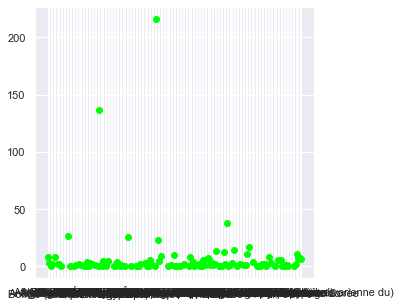

In [57]:
plt.plot(sous_nutrition['pays'],sous_nutrition['nb_habitants'] , linestyle = 'none', marker = 'o', c = 'lime')
plt.show()


In [78]:
sous_nutrition

,code_pays,pays,nb_habitants,Année,population
0,2,Afghanistan,7.9,2013,30552
1,202,Afrique du Sud,2.6,2013,52776
2,3,Albanie,0.2,2013,3173
3,4,Algérie,1.7,2013,39208
5,7,Angola,8.1,2013,21472
...,...,...,...,...,...
169,236,Venezuela (République bolivarienne du),1.9,2013,30405
170,237,Viet Nam,10.4,2013,91680
171,249,Yémen,7.2,2013,24407
172,251,Zambie,7.0,2013,14539


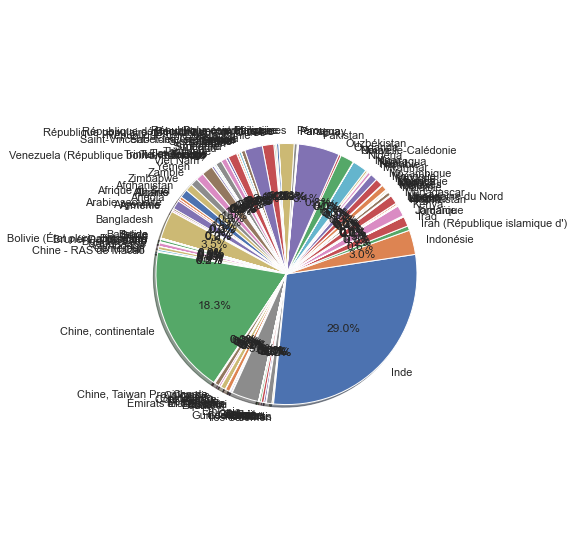

In [96]:
plt.figure(figsize = (8, 8))
labels = sous_nutrition['pays']
y = sous_nutrition['nb_habitants']




# Plot
plt.pie(y,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.tight_layout()
plt.show()